A fun demo of how much faster compiled code can be, as compared to interpreted code!

Like my other notebooks, the content below is as I developed it, so you'll find a lot of oddities. Don't take this as gospel, its just me experimenting with different approaches

In [2]:
import numpy as np
import matplotlib.pyplot as plt

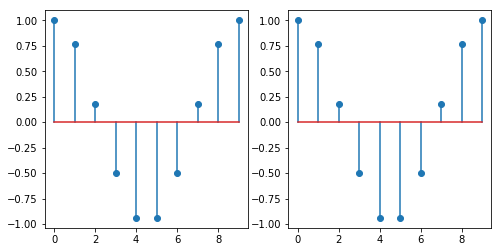

In [8]:
csx = [np.cos(2*np.pi*x) for x in np.linspace(0,1,10)]
rads = np.array([2*np.pi*x for x in np.linspace(0,1,10)])
csx_np = np.cos(rads)
#print(csx)
snx = [np.sin(2*np.pi*x) for x in np.linspace(0,1,10)]
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].stem(csx)
ax[1].stem(csx_np)
plt.show()

In [18]:
%%timeit
rads = np.array([2*np.pi*x for x in np.linspace(0,3,1000)])
csx_np = np.cos(rads)

962 µs ± 176 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit
#csx_np = np.cos([2*np.pi*x for x in np.linspace(0,3,1000)])
csx_np2 = np.cos(2*np.pi * np.linspace(0,3,1000))

900 µs ± 211 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit
csx = [np.cos(2*np.pi*x) for x in np.linspace(0,3,1000)]

5.35 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
#show that cos^2(x) + sin^2(x) = 1

In [5]:
%%timeit
#using lists
csx = [np.cos(2*np.pi*x) for x in np.linspace(0,1,10000)]
snx = [np.sin(2*np.pi*x) for x in np.linspace(0,1,10000)]
for c,s in zip(csx, snx):
    if c*c + s*s - 1 > 1e-6:
        print("Error!")
#print("done!")    

92.3 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%%timeit
csx_np = np.cos([2*np.pi*x for x in np.linspace(0,1,10000)])
snx_np = np.sin([2*np.pi*x for x in np.linspace(0,1,10000)])

#t = (np.square(csx_np) + np.square(snx_np) - np.ones(10000)) > 1e-6
#print(t.any())
t1 = np.square(csx_np) + np.square(snx_np) - np.ones(10000)
t2 = t1 > 1e-6
#print(t2.any())
#print(t)
## SKK: this is interesting. I wrote the second version thinking it is easier to read, 
## but the first would be faster. Turns out that the second is faster!!

24.7 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
csx_np = np.cos(2*np.pi*np.linspace(0,1,10000))
snx_np = np.sin(2*np.pi * np.linspace(0,1,10000))

#t = (np.square(csx_np) + np.square(snx_np) - np.ones(10000)) > 1e-6
#print(t.any())
t1 = np.square(csx_np) + np.square(snx_np) - 1
t2 = t1 > 1e-6

390 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
